result=linprog(c, A_ub, b_ub, A_eq, b_eq, bounds,method)
c-目标函数系数
A_ub-不等式约束矩阵
b_ub-不等式约束右端常数
A_eq-等式约束矩阵
b_eq-等式约束右端常数
bounds-变量的上下界
method-求解方法,默认为highs
result-线性规划的解,包括status,fun,x,slack,con,success,调用时用result.x表示变量的最优解等等

In [3]:
#
import numpy as np
from scipy.optimize import linprog

# 目标函数,取负值是因为linprog默认求最小值优化
c=[-20,-30,-45]

# 不等式约束的系数矩阵
A_ub=[[4,8,15],
      [1,1,1]]

# 不等式约束的右侧值向量B
b_ub=[100,20]
#定义域
bounds=[[0,None],[0,None],[0,None]]

#求解线性规划问题:
# 注意:由于Linprog默认求最小值优化,所以目标函数取负值
result=linprog(c,A_ub,b_ub,bounds=bounds)
print(result)
# 输出结果:
print('A,B,C三图分别通关的次数为:')
print(result.x)

#目标函数的最大值是最小值相反数
y=-result.fun
print("最终获得经验值为:")
print(y)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -450.0
              x: [ 1.500e+01  5.000e+00  0.000e+00]
            nit: 2
          lower:  residual: [ 1.500e+01  5.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  2.500e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-2.500e+00 -1.000e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0
A,B,C三图分别通关的次数为:
[15.  5.  0.]
最终获得经验值为:
450.0


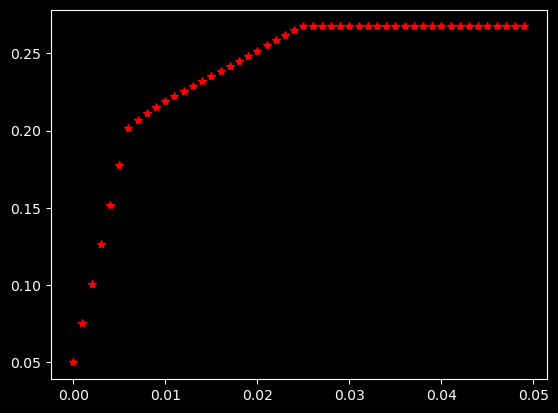

In [1]:
# 投资收益
import numpy as np
from scipy.optimize import linprog
from numpy import ones,diag,c_,zeros #用于创建和操作数组
# ones创建一个全1数组,diag创建对角矩阵,c_合并数组,zeros创建一个全0数组作为第一列
import matplotlib.pyplot as plt

# 设置matplotlib的参数使之支持latex文本和字体大小

# plt.rc('text',usetex=True)
# plt.rc('font',size=16)

# 定义目标函数
c=[-0.05,-0.27,-0.19,-0.185,-0.185]

# 线性不等式约束的系数矩阵
# 使用c_来合并数组,zeros创建一个全0数组作为第一列,diag创建对角矩阵
A=c_[zeros(4),diag([0.025,0.015,0.055,0.026])]

# 线性等式约束的系数矩阵和右侧的值
Aeq=[[1,1.01,1.02,1.045,1.065]]
beq=[1]

# 初始化参数a,以及两个用于存储结果的空列表
a=0
aa=[]
ss=[]

# 循环,a的值从0开始,以0.001的步长增加,直到0.05
while a<0.05:
    #创建线性不等式约束的右侧值(b)
    b=ones(4)*a

    #执行线性规划,得到最优解
    res=linprog(c,A_ub=A,b_ub=b,A_eq=Aeq,b_eq=beq,bounds=[(0,None),(0,None),(0,None),(0,None),(0,None)])

    # 提取线性规划的解向量x和最优解Q
    x=res.x
    Q=-res.fun

    # 将当前的a值与对应的最优值Q存入列表
    aa.append(a)
    ss.append(Q)

    # 计算新的a值
    a+=0.001

# 绘制结果,a值和最优值Q的关系图
plt.plot(aa,ss,'r*')#红色星号表示最优解
# plt.xlabel('$a$')
# plt.ylabel('$Q$',rotation=90)

# 显示图形
plt.show()







In [4]:
import numpy as np

arr=np.array([1,2,3])
new_arr=np.append(arr,4)
print(new_arr)

[1 2 3 4]
